In [1]:

import numpy as np
import os
import cv2
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:

# Load and augment images for each class
def load_and_augment_images(image_folder, label_value, augmentation_params):
    images = [img for img in os.listdir(image_directory + image_folder)]
    for i, image_name in enumerate(images):
        if image_name.split('.')[1] == 'png':
            image = cv2.imread(image_directory + image_folder + image_name)
            if image is not None:
                image = Image.fromarray(image, 'RGB')
                image = image.resize((SIZE, SIZE))
                image = np.array(image)

                # Augmentation for each class
                image_datagen = ImageDataGenerator(**augmentation_params)
                image = np.expand_dims(image, axis=0)
                augmented_images = [next(image_datagen.flow(image, batch_size=1))[0].astype(np.uint8) for _ in range(5)]  # Generating 5 augmented samples
                for augmented_image in augmented_images:
                    dataset.append(augmented_image)
                    label.append(label_value)



In [3]:
# Parameters:

# image_folder: The directory containing the images for a particular class.
# label_value: The label or class value assigned to the images in image_folder.
# augmentation_params: Parameters for data augmentation. This could include parameters like rotation range, width and height shifts, shear range, zoom range, etc.
# Loading and Augmenting Images:

# The function first lists all files in the specified image_folder.
# For each image in the folder, it loads the image using OpenCV (cv2.imread) and converts it to a PIL image object.
# It resizes the image to a fixed size (SIZE x SIZE), which is presumably required by the model or for consistency.
# It then converts the PIL image back to a NumPy array for further processing.
# Data Augmentation:

# The function uses Keras's ImageDataGenerator to perform data augmentation on the image.
# It creates an ImageDataGenerator object with the provided augmentation_params.
# For each image, it generates five augmented samples by applying random transformations based on the provided augmentation parameters.
# The augmented images are added to the dataset list, and their corresponding labels (label_value) are added to the label list.
# Output:

# The function does not return any value explicitly. Instead, it appends the augmented images and their labels to the dataset and label lists, respectively. This implies that dataset and label are assumed to be defined and accessible from within the function's scope.
# Overall Purpose:

# The purpose of this function is to load images from a specified directory, augment them to create additional training samples, and store the augmented samples along with their labels for training a machine learning model, presumably a convolutional neural network (CNN) or a similar model for image classification or segmentation.
# Usage:

# To use this function, you need to define the image_directory, SIZE, dataset, and label variables before calling it. After calling this function for each class of images in your dataset, you will have a dataset (dataset) containing augmented images and their corresponding labels (label) that can be used for training your model

In [4]:

# Assuming you've mounted Google Drive and set the image directory
image_directory = "../input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/"

SIZE = 128
dataset = []
label = []

# Load and augment images for each class
load_and_augment_images('benign/', 0, augmentation_params={})  # Benign class with label 0
load_and_augment_images('malignant/', 1, augmentation_params={'horizontal_flip': True, 'rotation_range': 30, 'brightness_range': [0.8, 1.2], 'zoom_range': 0.2})  # Malignant class with increased samples and label 1
load_and_augment_images('normal/', 2, augmentation_params={})  # Normal class with label 2


# Convert dataset and label to numpy arrays
dataset = np.array(dataset)
label = np.array(label)
print("Dataset shape:", dataset.shape)
print("Label shape:", label.shape)


Dataset shape: (7890, 128, 128, 3)
Label shape: (7890,)


In [5]:
dataset

array([[[[115, 115, 115],
         [ 39,  39,  39],
         [101, 101, 101],
         ...,
         [210, 210, 210],
         [207, 207, 207],
         [186, 186, 186]],

        [[114, 114, 114],
         [ 56,  56,  56],
         [112, 112, 112],
         ...,
         [184, 184, 184],
         [174, 174, 174],
         [170, 170, 170]],

        [[ 72,  72,  72],
         [127, 127, 127],
         [ 88,  88,  88],
         ...,
         [171, 171, 171],
         [181, 181, 181],
         [173, 173, 173]],

        ...,

        [[ 18,  18,  18],
         [ 20,  20,  20],
         [ 27,  27,  27],
         ...,
         [ 40,  40,  40],
         [ 39,  39,  39],
         [ 38,  38,  38]],

        [[ 23,  23,  23],
         [ 23,  23,  23],
         [ 24,  24,  24],
         ...,
         [ 40,  40,  40],
         [ 35,  35,  35],
         [ 30,  30,  30]],

        [[ 24,  24,  24],
         [ 25,  25,  25],
         [ 25,  25,  25],
         ...,
         [ 31,  31,  31],
        

In [6]:
from sklearn.metrics import classification_report, accuracy_score

# Convert dataset and label to numpy arrays
# dataset = np.array(dataset)
# label = np.array(label)

# Split the dataset into train and test sets
from sklearn.model_selection import train_test_split

num_samples, height, width, channels = dataset.shape
X_flat = dataset.reshape(num_samples, -1)  # Reshape to (samples, height*width*channels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_flat, label, test_size=0.15, random_state=42)



Accuracy =  0.972972972972973
Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       689
           1       1.00      0.89      0.94       300
           2       0.98      1.00      0.99       195

    accuracy                           0.97      1184
   macro avg       0.98      0.96      0.97      1184
weighted avg       0.97      0.97      0.97      1184



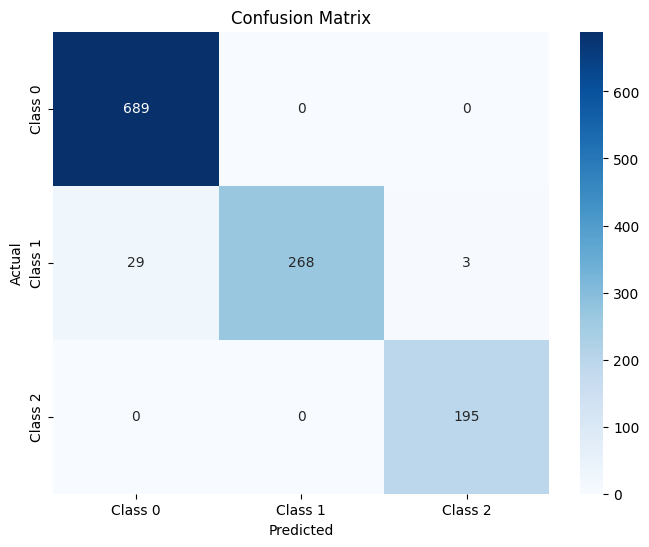

In [7]:
# Define and train your model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=None, min_samples_split=2, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
prediction_test = model.predict(X_test)

# Assess the accuracy of the model
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, prediction_test)
print("Accuracy = ", accuracy)

print("Classification Report:")
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the entire test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


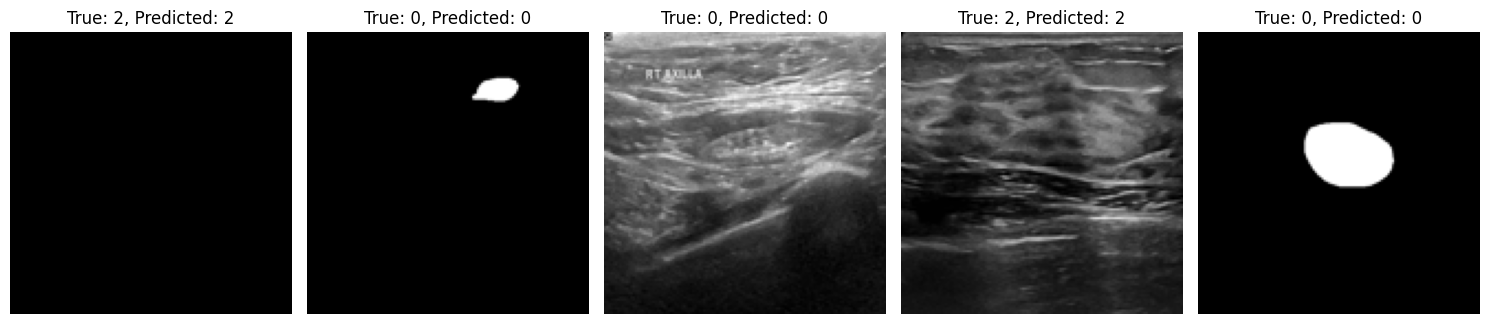

In [8]:
# Get some random indices from the test set
num_samples_to_display = 5  # Number of random samples to display
random_indices = np.random.choice(X_test.shape[0], num_samples_to_display, replace=False)

# Get the corresponding images, ground truth labels, and predicted labels
images_to_display = X_test[random_indices]
true_labels = y_test[random_indices]
predicted_labels = model.predict(images_to_display)

# Display the images along with their ground truth and predicted labels
plt.figure(figsize=(15, 5))
for i in range(num_samples_to_display):
    plt.subplot(1, num_samples_to_display, i + 1)
    plt.imshow(images_to_display[i].reshape(height, width, channels))  # Reshape the image to original dimensions if necessary
    plt.title(f"True: {true_labels[i]}, Predicted: {predicted_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [9]:
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming you have already trained your SVM model and stored it in the variable 'clf'

# Save the trained model as a pickle file
with open('rf.pkl', 'wb') as f:
    pickle.dump(model, f)


In [15]:
import numpy as np
import cv2
import pickle

# Load the trained Random Forest classifier
with open('rf.pkl', 'rb') as file:
    rf_model = pickle.load(file)

# Function to preprocess a single image
def preprocess_image(image_path, size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))  # Resize the image to the required size
    return image.flatten().reshape(1, -1)  # Flatten and reshape the image to match the input shape

# Load and preprocess a single image
image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (1).png'
path='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal/normal (1).png'
SIZE = 128  # Assuming images are resized to 128x128 during training
preprocessed_image = preprocess_image(path, SIZE)

# Perform prediction using the trained Random Forest classifier
prediction = rf_model.predict(preprocessed_image)

# Output the predicted class label
print("Predicted class label:", prediction)


Predicted class label: [2]


In [16]:

clf = SVC(C=10,kernel='rbf', random_state=42)
#clf.fit(X_resampled, y_resampled)  # y_resampled needs to be a 1D array

clf.fit(X_train, y_train)  # y_resampled needs to be a 1D array

# Predict on the test set
y_pred = clf.predict(X_test)

# Ensure y_test and y_pred are in the correct format
#y_test_argmax = y_test.argmax(axis=1) if len(y_test.shape) > 1 else y_test

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9805743243243243
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       689
           1       1.00      0.92      0.96       300
           2       0.98      1.00      0.99       195

    accuracy                           0.98      1184
   macro avg       0.99      0.97      0.98      1184
weighted avg       0.98      0.98      0.98      1184



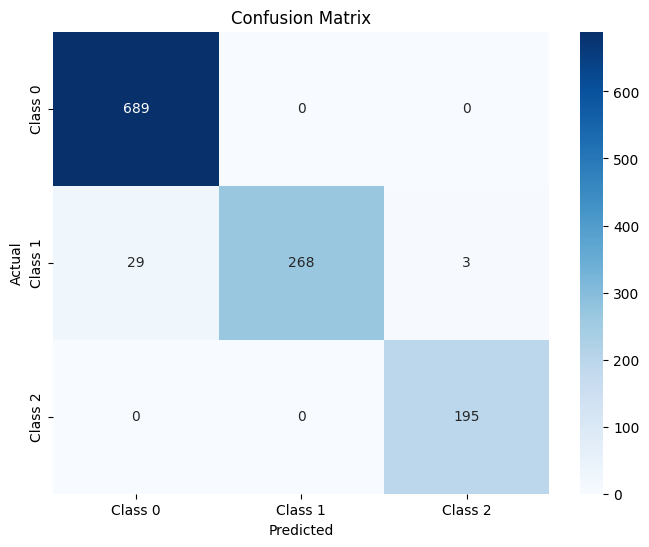

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict on the entire test set
y_pred = model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using Seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 0', 'Class 1', 'Class 2'],
            yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [18]:
import pickle
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Assuming you have already trained your SVM model and stored it in the variable 'clf'

# Save the trained model as a pickle file
with open('svm.pkl', 'wb') as f:
    pickle.dump(model, f)


In [24]:
import numpy as np
import cv2
import pickle

# Load the trained Random Forest classifier
with open('svm.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to preprocess a single image
def preprocess_image(image_path, size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))  # Resize the image to the required size
    return image.flatten().reshape(1, -1)  # Flatten and reshape the image to match the input shape

# Load and preprocess a single image
image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (1).png'
path='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/normal/normal (1).png'
path2='/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/malignant/malignant (106).png'
SIZE = 128  # Assuming images are resized to 128x128 during training
preprocessed_image = preprocess_image(path2, SIZE)

# Perform prediction using the trained Random Forest classifier
prediction = model.predict(preprocessed_image)

# Output the predicted class label
print("Predicted class label:", prediction)


Predicted class label: [1]


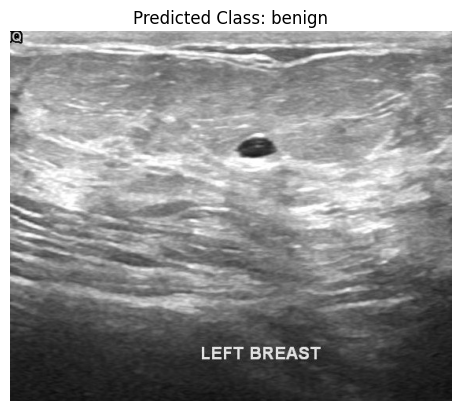

In [25]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

# Load the trained SVM classifier
with open('svm.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to preprocess a single image
def preprocess_image(image_path, size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))  # Resize the image to the required size
    return image.reshape(1, -1)  # Flatten the image to match the input shape

# Function to predict and display the result
def predict_and_display(image_path, model, size):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image_path, size)
    
    # Perform prediction using the trained model
    prediction = model.predict(preprocessed_image)[0]
    
    # Define class labels
    class_labels = {0: 'benign', 1: 'malignant', 2: 'normal'}
    
    # Display the input image along with the predicted class label
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Class: " + class_labels[prediction])
    plt.axis('off')
    plt.show()

# Load and preprocess a single image
image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (1).png'
predict_and_display(image_path, model, SIZE)


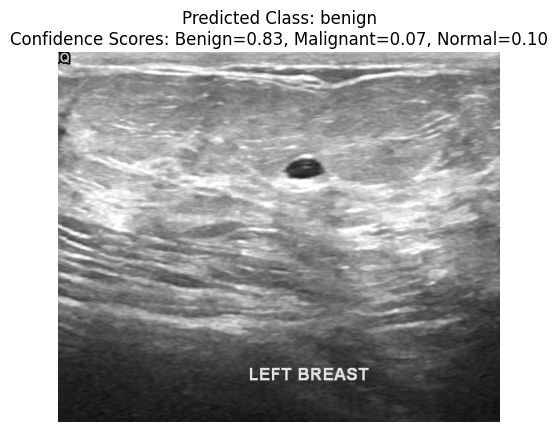

In [26]:
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

# Load the trained SVM classifier
with open('svm.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to preprocess a single image
def preprocess_image(image_path, size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))  # Resize the image to the required size
    return image.reshape(1, -1)  # Flatten the image to match the input shape

# Function to predict and display the result
def predict_and_display(image_path, model, size):
    # Load and preprocess the image
    image = cv2.imread(image_path)
    preprocessed_image = preprocess_image(image_path, size)
    
    # Perform prediction using the trained model
    confidence_scores = model.predict_proba(preprocessed_image)[0]
    predicted_class = model.predict(preprocessed_image)[0]
    
    # Define class labels
    class_labels = {0: 'benign', 1: 'malignant', 2: 'normal'}
    
    # Display the input image along with the predicted class label and confidence scores
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Predicted Class: " + class_labels[predicted_class] + "\n"
              f"Confidence Scores: Benign={confidence_scores[0]:.2f}, Malignant={confidence_scores[1]:.2f}, Normal={confidence_scores[2]:.2f}")
    plt.axis('off')
    plt.show()

# Load and preprocess a single image
image_path = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT/benign/benign (1).png'
predict_and_display(image_path, model, SIZE)


In [27]:
import os
import cv2
import pandas as pd
import numpy as np
import pickle

# Load the trained SVM classifier
with open('svm.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to preprocess a single image
def preprocess_image(image_path, size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, (size, size))  # Resize the image to the required size
    return image.flatten().reshape(1, -1)  # Flatten the image to match the input shape

# Function to predict and return the predicted class and confidence scores
def predict_image(image_path, model, size):
    # Load and preprocess the image
    preprocessed_image = preprocess_image(image_path, size)
    
    # Perform prediction using the trained model
    confidence_scores = model.predict_proba(preprocessed_image)[0]
    predicted_class = model.predict(preprocessed_image)[0]
    
    return predicted_class, confidence_scores

# Define the root directory containing subdirectories for each class
root_dir = '/kaggle/input/breast-ultrasound-images-dataset/Dataset_BUSI_with_GT'

# Initialize lists to store results
dir_name_list = []
image_name_list = []
prediction_list = []
confidence_list = []

# Traverse each subdirectory
for dir_name in os.listdir(root_dir):
    if os.path.isdir(os.path.join(root_dir, dir_name)):
        # Traverse each image file in the subdirectory
        for image_name in os.listdir(os.path.join(root_dir, dir_name)):
            if image_name.endswith('.png'):  # Adjust file extension as needed
                # Predict the image and get the results
                image_path = os.path.join(root_dir, dir_name, image_name)
                predicted_class, confidence_scores = predict_image(image_path, model, SIZE)
                
                # Store the results in lists
                dir_name_list.append(dir_name)
                image_name_list.append(image_name)
                prediction_list.append(predicted_class)
                confidence_list.append(confidence_scores[predicted_class])

# Create a DataFrame from the lists
results_df = pd.DataFrame({
    'Directory': dir_name_list,
    'Image_Name': image_name_list,
    'Prediction': prediction_list,
    'Confidence': confidence_list
})

# Display the DataFrame
print(results_df)


      Directory               Image_Name  Prediction  Confidence
0        benign           benign (2).png           0        0.81
1        benign         benign (285).png           0        0.87
2        benign    benign (166)_mask.png           0        0.94
3        benign    benign (290)_mask.png           0        0.95
4        benign         benign (300).png           0        0.84
...         ...                      ...         ...         ...
1573  malignant        malignant (6).png           1        0.58
1574  malignant      malignant (193).png           0        0.62
1575  malignant  malignant (74)_mask.png           0        0.86
1576  malignant  malignant (75)_mask.png           1        0.98
1577  malignant      malignant (184).png           1        0.49

[1578 rows x 4 columns]
